# Evaluation Framework

Minimal evaluation framework for wind speed prediction models.


In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))

from eval_helpers import compute_metrics, evaluate, plot_predictions, compare
import numpy as np
import matplotlib.pyplot as plt


## Test compute_metrics()


In [2]:
# Simple test: perfect predictions
y_true = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y_pred = np.array([1.0, 2.0, 3.0, 4.0, 5.0])

metrics = compute_metrics(y_true, y_pred)
print("Perfect predictions:")
print(f"  MAE:  {metrics['mae']:.4f}")
print(f"  RMSE: {metrics['rmse']:.4f}")
print(f"  R²:   {metrics['r2']:.4f}")


Perfect predictions:
  MAE:  0.0000
  RMSE: 0.0000
  R²:   1.0000


In [3]:
# Test with some error
y_true = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y_pred = np.array([1.1, 1.9, 3.2, 3.8, 5.1])  # Small errors

metrics = compute_metrics(y_true, y_pred)
print("Predictions with small errors:")
print(f"  MAE:  {metrics['mae']:.4f}")
print(f"  RMSE: {metrics['rmse']:.4f}")
print(f"  R²:   {metrics['r2']:.4f}")


Predictions with small errors:
  MAE:  0.1400
  RMSE: 0.1483
  R²:   0.9890


## Test evaluate()


In [4]:
from sklearn.linear_model import LinearRegression

# Simple test with dummy data
X_train = np.array([[1], [2], [3], [4]])
y_train = np.array([2, 4, 6, 8])
X_test = np.array([[5], [6]])
y_test = np.array([10, 12])

model = LinearRegression()
result = evaluate(model, X_train, y_train, X_test, y_test, model_name="TestModel")

print(f"Model: {result['model_name']}")
print(f"MAE:  {result['metrics']['mae']:.4f}")
print(f"RMSE: {result['metrics']['rmse']:.4f}")
print(f"R²:   {result['metrics']['r2']:.4f}")
print(f"\nPredictions: {result['predictions']}")


Model: TestModel
MAE:  0.0000
RMSE: 0.0000
R²:   1.0000

Predictions: [10. 12.]


## Test plot_predictions()


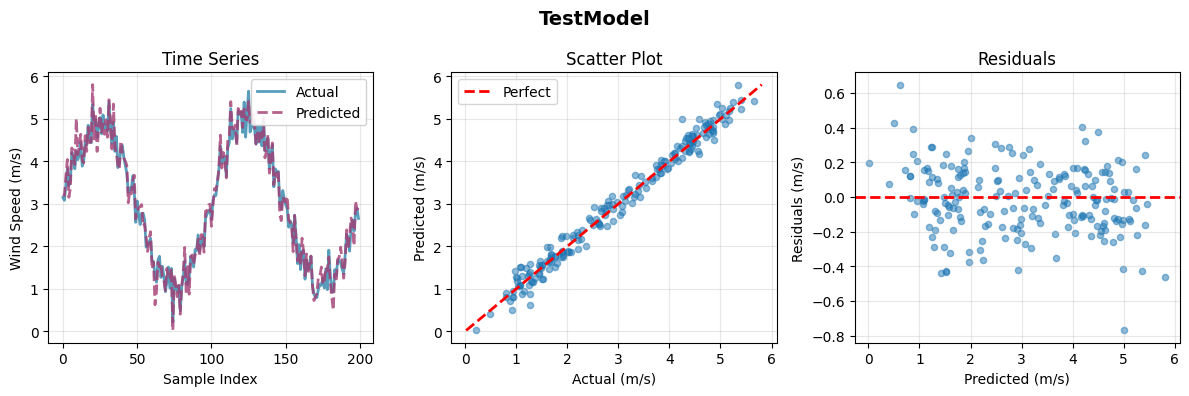

In [5]:
# Create some dummy time series data
np.random.seed(42)
n = 200
y_true = 3 + 2 * np.sin(np.linspace(0, 4*np.pi, n)) + np.random.normal(0, 0.3, n)
y_pred = y_true + np.random.normal(0, 0.2, n)  # Predictions with small errors

# Test plot
fig = plot_predictions(y_true, y_pred, model_name="TestModel")
plt.show()


**Plot explanations:**

1. **Time Series**: Shows predicted vs actual wind speed over time. Good predictions should closely follow the actual values. The plot shows the first 1000 samples for clarity.

2. **Scatter Plot**: Shows the relationship between actual and predicted values. Points should cluster along the red diagonal line (perfect prediction). A tight cluster indicates good predictions.

3. **Residuals**: Shows the prediction errors (actual - predicted) vs predicted values. Ideally, residuals should be randomly distributed around zero with no clear pattern, indicating the model captures the data well.


## Test compare()



MODEL COMPARISON
           Model    MAE (m/s)   RMSE (m/s)       R²
LinearRegression 1.184238e-15 1.450389e-15 1.000000
           Ridge 7.272727e-01 7.422696e-01 0.793388


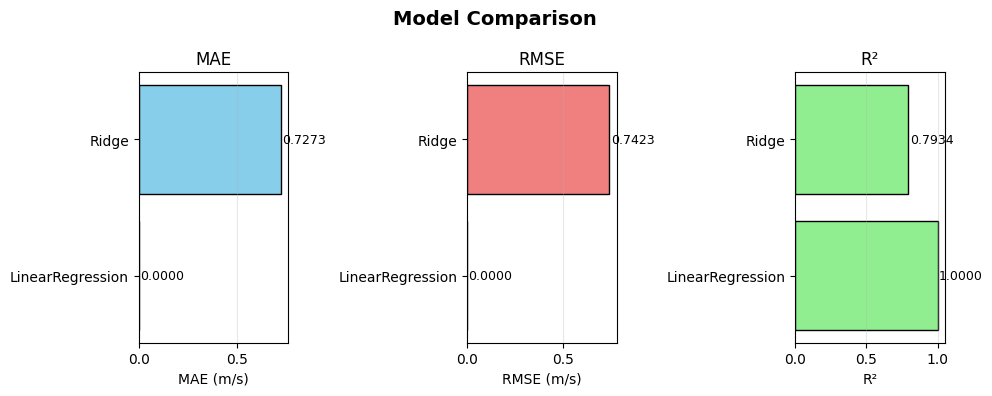

In [6]:
from sklearn.linear_model import LinearRegression, Ridge

# Create dummy results for multiple models
X_train = np.array([[1], [2], [3], [4], [5]])
y_train = np.array([2, 4, 6, 8, 10])
X_test = np.array([[6], [7], [8]])
y_test = np.array([12, 14, 16])

# Evaluate multiple models
results = []
for model, name in [(LinearRegression(), "LinearRegression"), 
                     (Ridge(alpha=1.0), "Ridge")]:
    result = evaluate(model, X_train, y_train, X_test, y_test, model_name=name)
    results.append(result)

# Compare them
scorecard = compare(results, plot=True)
